In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Data Science project/SMS spam Detection/spam.csv',encoding='latin-1')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

##1 Data Cleaning

In [6]:
#1 find null values and drop them

In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
#so maximum null values in column 2,3,4.so drop them 
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns',inplace=True)

In [9]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#now change the column name for easy understanding
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
df.sample(5)

,target,text
3041,ham,Slaaaaave ! Where are you ? Must I summon you ...
3255,ham,Who were those people ? Were you in a tour ? I...
1583,ham,"It's cool, let me know before it kicks off aro..."
774,ham,Just sleeping..and surfing
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#use LabelEncoder to enocod target values
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
df['target']=encoder.fit_transform(df['target'])

In [15]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#here target=1 means its spam and 0 means its ham
#we checked there is no missing values
#now check for duplicate values

In [17]:
df.duplicated().sum()

403

In [18]:
df=df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()


0

In [20]:
df.shape

(5169, 2)

##2 EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [24]:
#so we have 4516 ham and 653 spam
#from data we can say that data is imbalanced as spam is very low compare to ham

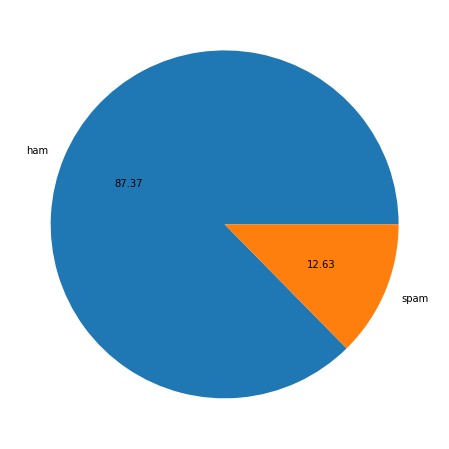

In [25]:
plt.figure(figsize=(8,8))
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [26]:
#now we perform EDA on text
#1 find No. of charcters in text
#2.find No. of words in text
#3.find No. of sentences in text
#to perform 2 and 3 we need nltk library

In [27]:
!pip install nltk

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
df['num_characters']=df['text'].apply(len)

In [31]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [33]:
df.head(4)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13


In [34]:
df['num_sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [35]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [37]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [38]:
#for spam average length of sms is 137 char or 27 words or 3 sentences.

In [39]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [40]:
#for ham average length of sms is 70 char or 17 words or 2 sentences.

In [41]:
#we can see it more clearning by ploting histogram for this

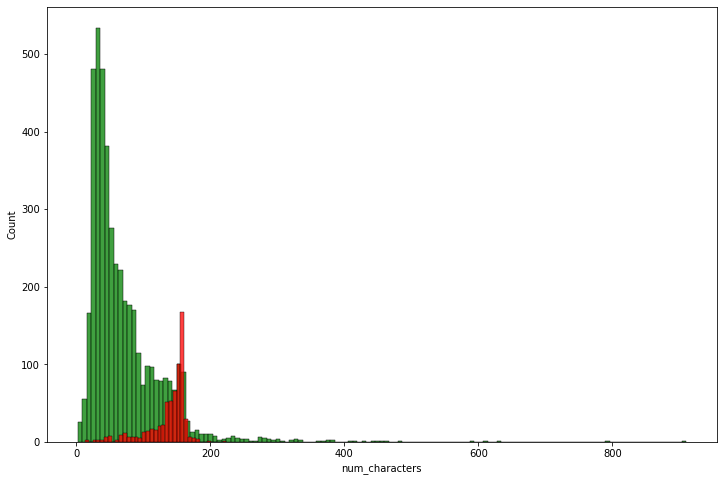

In [42]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')


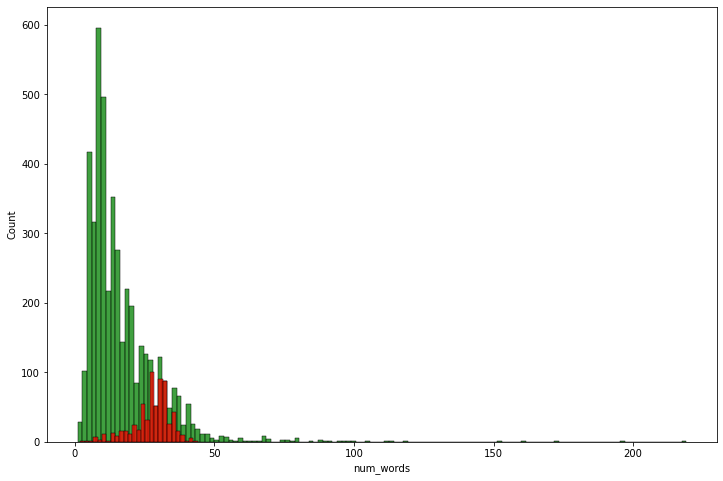

In [43]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='red')


In [44]:
#from this histogram we can say that the higher the length of sms chances of its spam is high

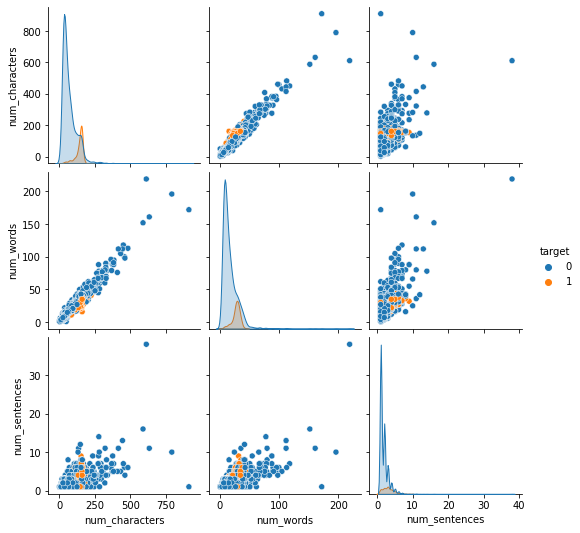

In [45]:
sns.pairplot(df,hue='target')

In [46]:
#from pair plot we can not interpret any meaning full thing so we use corr func so we can find any correaltion between any columns and target
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.264198,0.267602
num_characters,0.384717,1.000000,0.965307,0.626118
num_words,0.264198,0.965307,1.000000,0.683561
num_sentences,0.267602,0.626118,0.683561,1.000000


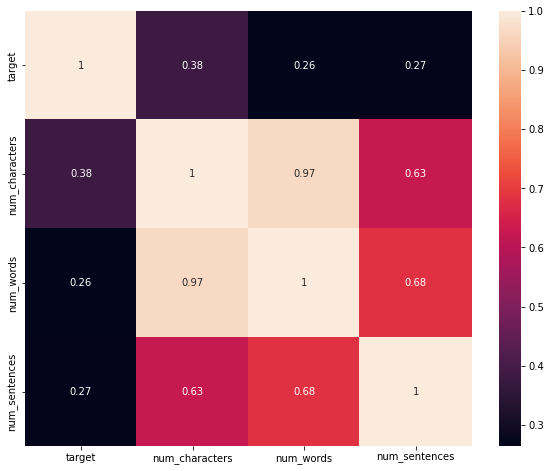

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [48]:
#from map we can say that target and num_characters have very much correlation irrespective of other so we will use choose num_char as own main column

##3 Data Preprocessing

*   lower case
*   Tokensization

*   Removing special characters
*   Removing stop words and punctuation

*   stemming(covert same type of words in one)








In [49]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [50]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
#to perform all this steps we make one function which can do all steps in one shot
def transformed_text(text):
        text=text.lower()
        text=nltk.word_tokenize(text)

        y=[]
        for i in text:
          if i.isalnum():
            y.append(i)
        
        text=y[:]
        y.clear()

        for i in text:
          if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
        text=y[:]
        y.clear()

        for i in text:
           y.append(ps.stem(i))

        return" ".join(y)



In [52]:
df['transformed_text']=df['text'].apply(transformed_text)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
#word cloud
from  wordcloud import WordCloud

In [55]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

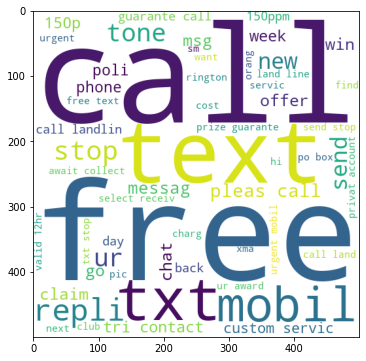

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [58]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

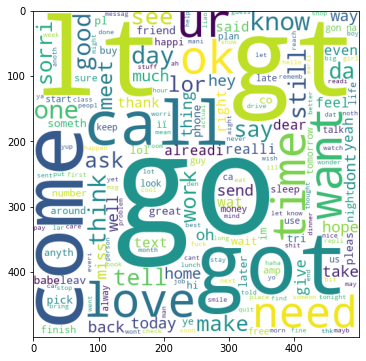

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [62]:
len(df[df['target']==1]['transformed_text'])

653

In [63]:
#tp show top 30 words of spam and ham
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [64]:
len(spam_corpus)

9883

In [65]:
from collections import Counter

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


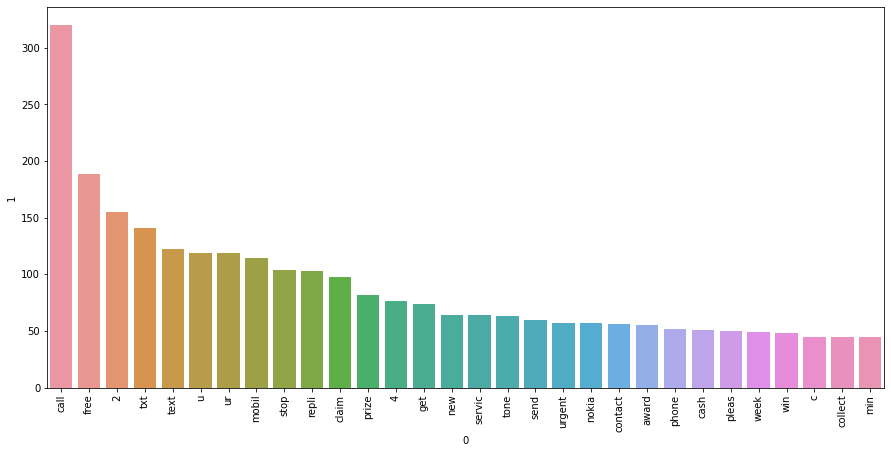

In [66]:
plt.figure(figsize=(15,7))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [67]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
     for word in msg.split():
       ham_corpus.append(word)

In [68]:
len(ham_corpus)

34771

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


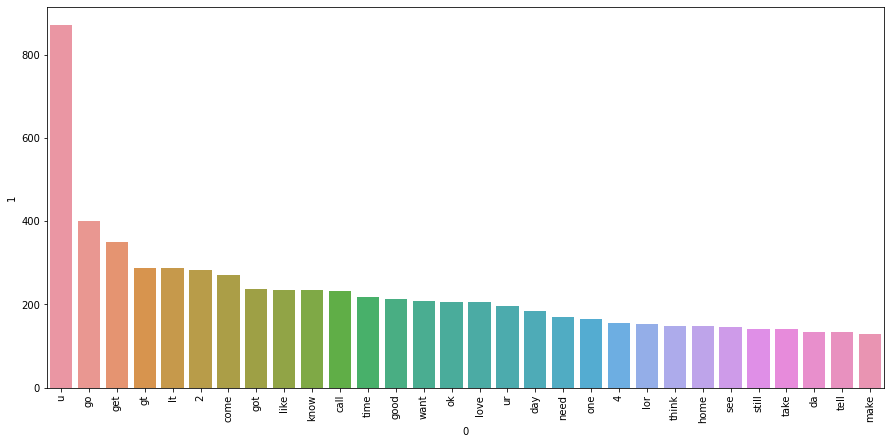

In [69]:
plt.figure(figsize=(15,7))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##4 Model Building
######(In this we use NaiveBayesClasifier)
#####process is data>>vectorise>>apply NBC>>find accuray and precision


1.   we have input in text form so first convert it into numeric/vector form
*   we can do it by using BOW(bag of words)



In [77]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [78]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [81]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [82]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [83]:
X.shape

(5169, 3000)

In [84]:
y=df['target'].values

In [85]:
y.shape

(5169,)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [89]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [90]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [94]:
gnb.fit(X_train,y_train)
y_predict=gnb.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))


0.867504835589942
[[785 111]
 [ 26 112]]
0.5022421524663677


In [95]:
mnb.fit(X_train,y_train)
y_predict=mnb.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))


0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [96]:
bnb.fit(X_train,y_train)
y_predict=bnb.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(precision_score(y_test,y_predict))


0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [97]:
#we use all the model to check which is best

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [99]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [100]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [101]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [102]:
train_classifier(etc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9831932773109243)

In [103]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8585858585858586
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  RF
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8527131782945736
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For  xgb
Accuracy -  0.9468085106382979
Precision -  0.946236559139785


In [104]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [105]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
8,ETC,0.977756,0.983193
5,RF,0.971954,0.973913
0,SVC,0.974855,0.966667
4,LR,0.957447,0.951923
10,xgb,0.946809,0.946237
6,AdaBoost,0.964217,0.931624
9,GBDT,0.948743,0.929293
3,DT,0.935203,0.858586


In [106]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [107]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.972921
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.971954
4,SVC,Accuracy,0.974855
5,LR,Accuracy,0.957447
6,xgb,Accuracy,0.946809
7,AdaBoost,Accuracy,0.964217
8,GBDT,Accuracy,0.948743
9,DT,Accuracy,0.935203


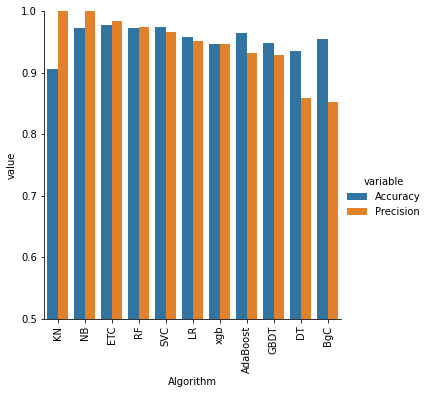

In [108]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [109]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [110]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [111]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [112]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [113]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [114]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [115]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000
2,ETC,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193,0.977756,0.983193
3,RF,0.971954,0.973913,0.971954,0.973913,0.971954,0.973913,0.971954,0.973913
4,SVC,0.974855,0.966667,0.974855,0.966667,0.974855,0.966667,0.974855,0.966667
5,LR,0.957447,0.951923,0.957447,0.951923,0.957447,0.951923,0.957447,0.951923
6,xgb,0.946809,0.946237,0.946809,0.946237,0.946809,0.946237,0.946809,0.946237
7,AdaBoost,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624,0.964217,0.931624
8,GBDT,0.948743,0.929293,0.948743,0.929293,0.948743,0.929293,0.948743,0.929293
9,DT,0.935203,0.858586,0.935203,0.858586,0.935203,0.858586,0.935203,0.858586


In [116]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [117]:
voting=VotingClassifier(estimators=[('svam',svc),('nb',mnb),('et',etc)],voting='soft')

In [118]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svam',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [120]:
y_pred=voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
precision 0.975609756097561


In [121]:
#Applying Stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [122]:
from sklearn.ensemble import StackingClassifier

In [123]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [124]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))


Accuracy 0.9777562862669246
precision 0.9323308270676691


In [125]:
import pickle

In [131]:
pickle.dump(tfidf,open('/content/drive/MyDrive/Data Science project/SMS spam Detection/vectorizer.pkl','wb'))
pickle.dump(mnb,open('/content/drive/MyDrive/Data Science project/SMS spam Detection/model.pkl','wb'))